In [1]:
import numpy as np
import pandas as pd
import re
import importlib
import dictionaries
importlib.reload(dictionaries)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<module 'dictionaries' from 'C:\\Users\\asus\\Desktop\\AI-ML_Month_Major_Project\\dictionaries.py'>

In [2]:
font = {'family': 'serif',
        'color':  'white',
        'weight': 'bold',
        'size': 16,
        }

In [3]:
df = pd.read_csv('TwitterSentimentAnalysisDataset.csv',encoding='windows-1252',names=['Target','ID','Date','Flag','User','Text'])

Exploratory Data Analysis

In [4]:
df.shape

(1600000, 6)

In [5]:
df.head()

,Target,ID,Date,Flag,User,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [6]:
df.sample(n=10,random_state=15)

,Target,ID,Date,Flag,User,Text
561460,0,2205426244,Wed Jun 17 04:42:48 PDT 2009,NO_QUERY,BurntCaramel,@mjsluijs Nah.. Most of the antivirus program...
1570185,4,2188543728,Mon Jun 15 22:05:33 PDT 2009,NO_QUERY,gab_iii,@zacseif fly to arizona and we'll have video g...
58096,0,1685820960,Sun May 03 02:15:21 PDT 2009,NO_QUERY,NoSheds,@stephenfry I think you killed mobypic - Site ...
283874,0,1993027493,Mon Jun 01 09:42:50 PDT 2009,NO_QUERY,carebearrr,@mileycyrus and we're gonna miss you guys so ...
34009,0,1564669484,Mon Apr 20 04:29:22 PDT 2009,NO_QUERY,timaree,so tired this morning
801000,4,1468005634,Mon Apr 06 23:13:16 PDT 2009,NO_QUERY,MerCleve,@matt_the_great forget the rest...You need to ...
1066153,4,1965220208,Fri May 29 15:32:16 PDT 2009,NO_QUERY,jemcsh,"@tommcfly ur prince harry came to the usa, so ..."
796932,0,2327967353,Thu Jun 25 09:00:32 PDT 2009,NO_QUERY,evestirling,"@DrJoolz thanks, I went there before...it does..."
1345228,4,2043955672,Fri Jun 05 08:39:37 PDT 2009,NO_QUERY,jclanger,change of plans sims party tonight and then t...
415064,0,2060975737,Sat Jun 06 19:56:30 PDT 2009,NO_QUERY,Valv30,@Twisted4Jordan I am sad bout that. But this ...


In [7]:
df.columns

Index(['Target', 'ID', 'Date', 'Flag', 'User', 'Text'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Target  1600000 non-null  int64 
 1   ID      1600000 non-null  int64 
 2   Date    1600000 non-null  object
 3   Flag    1600000 non-null  object
 4   User    1600000 non-null  object
 5   Text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [9]:
df['Flag'].nunique()

1

In [10]:
df = df.drop('Flag',axis=1)

In [11]:
df

,Target,ID,Date,User,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [12]:
df.dtypes

Target     int64
ID         int64
Date      object
User      object
Text      object
dtype: object

In [13]:
df['Date'].head()

0    Mon Apr 06 22:19:45 PDT 2009
1    Mon Apr 06 22:19:49 PDT 2009
2    Mon Apr 06 22:19:53 PDT 2009
3    Mon Apr 06 22:19:57 PDT 2009
4    Mon Apr 06 22:19:57 PDT 2009
Name: Date, dtype: object

In [14]:
df['Date']

0          Mon Apr 06 22:19:45 PDT 2009
1          Mon Apr 06 22:19:49 PDT 2009
2          Mon Apr 06 22:19:53 PDT 2009
3          Mon Apr 06 22:19:57 PDT 2009
4          Mon Apr 06 22:19:57 PDT 2009
                       ...             
1599995    Tue Jun 16 08:40:49 PDT 2009
1599996    Tue Jun 16 08:40:49 PDT 2009
1599997    Tue Jun 16 08:40:49 PDT 2009
1599998    Tue Jun 16 08:40:49 PDT 2009
1599999    Tue Jun 16 08:40:50 PDT 2009
Name: Date, Length: 1600000, dtype: object

In [15]:
df['Date'] = df['Date'].str.replace(' PDT 2009','')

In [16]:
df.head()

,Target,ID,Date,User,Text
0,0,1467810369,Mon Apr 06 22:19:45,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57,Karoli,"@nationwideclass no, it's not behaving at all...."


In [17]:
df[['Day','Month','Date','Time']]=df['Date'].str.split(pat=" ",expand=True)

In [18]:
df

,Target,ID,Date,User,Text,Day,Month,Time
0,0,1467810369,06,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Mon,Apr,22:19:45
1,0,1467810672,06,scotthamilton,is upset that he can't update his Facebook by ...,Mon,Apr,22:19:49
2,0,1467810917,06,mattycus,@Kenichan I dived many times for the ball. Man...,Mon,Apr,22:19:53
3,0,1467811184,06,ElleCTF,my whole body feels itchy and like its on fire,Mon,Apr,22:19:57
4,0,1467811193,06,Karoli,"@nationwideclass no, it's not behaving at all....",Mon,Apr,22:19:57
...,...,...,...,...,...,...,...,...
1599995,4,2193601966,16,AmandaMarie1028,Just woke up. Having no school is the best fee...,Tue,Jun,08:40:49
1599996,4,2193601969,16,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,Tue,Jun,08:40:49
1599997,4,2193601991,16,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,Tue,Jun,08:40:49
1599998,4,2193602064,16,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,Tue,Jun,08:40:49


In [19]:
df = df.drop('Date',axis=1)

In [20]:
df

,Target,ID,User,Text,Day,Month,Time
0,0,1467810369,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Mon,Apr,22:19:45
1,0,1467810672,scotthamilton,is upset that he can't update his Facebook by ...,Mon,Apr,22:19:49
2,0,1467810917,mattycus,@Kenichan I dived many times for the ball. Man...,Mon,Apr,22:19:53
3,0,1467811184,ElleCTF,my whole body feels itchy and like its on fire,Mon,Apr,22:19:57
4,0,1467811193,Karoli,"@nationwideclass no, it's not behaving at all....",Mon,Apr,22:19:57
...,...,...,...,...,...,...,...
1599995,4,2193601966,AmandaMarie1028,Just woke up. Having no school is the best fee...,Tue,Jun,08:40:49
1599996,4,2193601969,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,Tue,Jun,08:40:49
1599997,4,2193601991,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,Tue,Jun,08:40:49
1599998,4,2193602064,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,Tue,Jun,08:40:49


In [21]:
df['Target'].unique()

array([0, 4], dtype=int64)

It can be seen that Target=0 represents negative(sad,upset,angry etc.) tweets

In [22]:
df[df['Target']==0].head(10)

,Target,ID,User,Text,Day,Month,Time
0,0,1467810369,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Mon,Apr,22:19:45
1,0,1467810672,scotthamilton,is upset that he can't update his Facebook by ...,Mon,Apr,22:19:49
2,0,1467810917,mattycus,@Kenichan I dived many times for the ball. Man...,Mon,Apr,22:19:53
3,0,1467811184,ElleCTF,my whole body feels itchy and like its on fire,Mon,Apr,22:19:57
4,0,1467811193,Karoli,"@nationwideclass no, it's not behaving at all....",Mon,Apr,22:19:57
5,0,1467811372,joy_wolf,@Kwesidei not the whole crew,Mon,Apr,22:20:00
6,0,1467811592,mybirch,Need a hug,Mon,Apr,22:20:03
7,0,1467811594,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...,Mon,Apr,22:20:03
8,0,1467811795,2Hood4Hollywood,@Tatiana_K nope they didn't have it,Mon,Apr,22:20:05
9,0,1467812025,mimismo,@twittera que me muera ?,Mon,Apr,22:20:09


While Target=4 represents positive tweets

In [23]:
df[df['Target']!=0].head(10)

,Target,ID,User,Text,Day,Month,Time
800000,4,1467822272,ersle,I LOVE @Health4UandPets u guys r the best!!,Mon,Apr,22:22:45
800001,4,1467822273,becca210,im meeting up with one of my besties tonight! ...,Mon,Apr,22:22:45
800002,4,1467822283,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S...",Mon,Apr,22:22:46
800003,4,1467822287,katarinka,Being sick can be really cheap when it hurts t...,Mon,Apr,22:22:46
800004,4,1467822293,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone,Mon,Apr,22:22:46
800005,4,1467822391,ajarofalmonds,@ProductOfFear You can tell him that I just bu...,Mon,Apr,22:22:47
800006,4,1467822447,vmdavinci,@r_keith_hill Thans for your response. Ihad al...,Mon,Apr,22:22:51
800007,4,1467822465,jessicavaliyi,"@KeepinUpWKris I am so jealous, hope you had a...",Mon,Apr,22:22:48
800008,4,1467822489,emmasaur28,"@tommcfly ah, congrats mr fletcher for finally...",Mon,Apr,22:22:49
800009,4,1467822496,SherylBreuker,@e4VoIP I RESPONDED Stupid cat is helping me ...,Mon,Apr,22:22:49


Keeping only necessary data and discarding the rest

In [24]:
df = df[['Target','User','Text','Day']]

In [25]:
df

,Target,User,Text,Day
0,0,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Mon
1,0,scotthamilton,is upset that he can't update his Facebook by ...,Mon
2,0,mattycus,@Kenichan I dived many times for the ball. Man...,Mon
3,0,ElleCTF,my whole body feels itchy and like its on fire,Mon
4,0,Karoli,"@nationwideclass no, it's not behaving at all....",Mon
...,...,...,...,...
1599995,4,AmandaMarie1028,Just woke up. Having no school is the best fee...,Tue
1599996,4,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,Tue
1599997,4,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,Tue
1599998,4,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,Tue


In [26]:
df['Target']=df['Target'].replace(4,1)

C:\Users\asus\AppData\Local\Temp\ipykernel_14052\1862341194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target']=df['Target'].replace(4,1)


In [27]:
df[df['Target']!=0].head(10)

,Target,User,Text,Day
800000,1,ersle,I LOVE @Health4UandPets u guys r the best!!,Mon
800001,1,becca210,im meeting up with one of my besties tonight! ...,Mon
800002,1,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S...",Mon
800003,1,katarinka,Being sick can be really cheap when it hurts t...,Mon
800004,1,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone,Mon
800005,1,ajarofalmonds,@ProductOfFear You can tell him that I just bu...,Mon
800006,1,vmdavinci,@r_keith_hill Thans for your response. Ihad al...,Mon
800007,1,jessicavaliyi,"@KeepinUpWKris I am so jealous, hope you had a...",Mon
800008,1,emmasaur28,"@tommcfly ah, congrats mr fletcher for finally...",Mon
800009,1,SherylBreuker,@e4VoIP I RESPONDED Stupid cat is helping me ...,Mon


In [28]:
df

,Target,User,Text,Day
0,0,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Mon
1,0,scotthamilton,is upset that he can't update his Facebook by ...,Mon
2,0,mattycus,@Kenichan I dived many times for the ball. Man...,Mon
3,0,ElleCTF,my whole body feels itchy and like its on fire,Mon
4,0,Karoli,"@nationwideclass no, it's not behaving at all....",Mon
...,...,...,...,...
1599995,1,AmandaMarie1028,Just woke up. Having no school is the best fee...,Tue
1599996,1,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,Tue
1599997,1,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,Tue
1599998,1,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,Tue


In [29]:
text, sentiment = list(df['Text']), list(df['Target'])

In [30]:
import time
t = time.time()
preprocessedtext = dictionaries.preprocess(text) #the preprocess function at work
print(f'Text Processing Done.')
print(f'Time taken for text processing: {round(time.time()-t)} seconds')

Text Processing Done.
Time taken for text processing: 276 seconds


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(preprocessedtext, sentiment, test_size = 0.05, random_state = 0)

In [32]:
X_train, X_test = dictionaries.vectorizes(X_train,X_test)

Vectoriser fitted.


C:\Users\asus\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


No. of feature_words:  500000
First Fifty Words:  ['aa', 'aac', 'aachen', 'aack', 'aackk', 'aaden', 'aadmi', 'aaf', 'aag', 'aagain', 'aages', 'aages ago', 'aaggh', 'aagghh', 'aagh', 'aaghh', 'aah', 'aah awesome', 'aah bad', 'aah beautiful', 'aah bed', 'aah better', 'aah bored', 'aah cant', 'aah feel', 'aah feeling', 'aah get', 'aah god', 'aah going', 'aah gonna', 'aah good', 'aah got', 'aah great', 'aah guy', 'aah hate', 'aah ipod', 'aah jealous', 'aah life', 'aah like', 'aah love', 'aah make', 'aah man', 'aah miss', 'aah need', 'aah nice', 'aah nothing', 'aah really', 'aah see', 'aah soo', 'aah sorry']


# Naive Bayes

In [33]:
print(X_train[:2][:2])

  (0, 487779)	0.4660254738023579
  (0, 487655)	0.23144687926114338
  (0, 406910)	0.5109660311324272
  (0, 406865)	0.3472805377883448
  (0, 343564)	0.48801295683933443
  (0, 104100)	0.33076562231693457
  (1, 488251)	0.29554417807787536
  (1, 487655)	0.17420391459251497
  (1, 422623)	0.3175236144969847
  (1, 421528)	0.1305099155561257
  (1, 409983)	0.40467641823913225
  (1, 409536)	0.19191003073196192
  (1, 285244)	0.2475852864657916
  (1, 285063)	0.16405036542703474
  (1, 120985)	0.39897093503811815
  (1, 120507)	0.17509821954924334
  (1, 116684)	0.4333503801659771
  (1, 116681)	0.28995054316382124
  (1, 90753)	0.11810177099533833


In [34]:
from sklearn.naive_bayes import BernoulliNB

In [74]:
acc = []

              precision    recall  f1-score   support

           0       0.79      0.77      0.78     39989
           1       0.78      0.80      0.79     40011

    accuracy                           0.78     80000
   macro avg       0.78      0.78      0.78     80000
weighted avg       0.78      0.78      0.78     80000



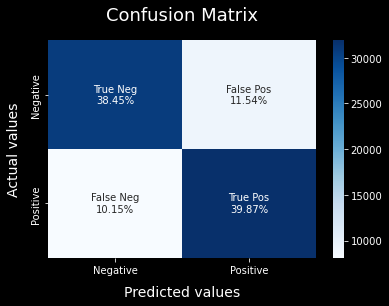

In [75]:
import evaluating
importlib.reload(evaluating)
BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train, y_train)
a, f1 = evaluating.model_evaluate(BNBmodel,X_test,y_test,font)
acc.append(a)

# Support Vector Machine

              precision    recall  f1-score   support

           0       0.79      0.77      0.78     39989
           1       0.77      0.80      0.79     40011

    accuracy                           0.78     80000
   macro avg       0.78      0.78      0.78     80000
weighted avg       0.78      0.78      0.78     80000



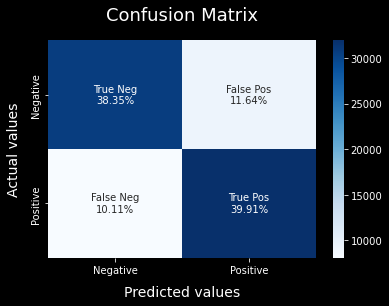

In [76]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
ab, f12 = evaluating.model_evaluate(SVCmodel,X_test,y_test,font)
acc.append(ab)

# Logistic Regression

              precision    recall  f1-score   support

           0       0.81      0.78      0.79     39989
           1       0.79      0.81      0.80     40011

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



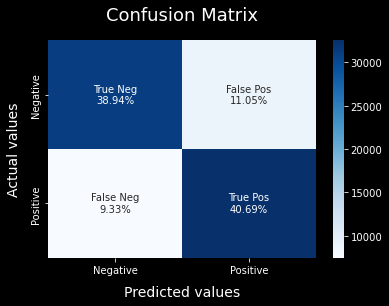

In [77]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
ac, f13 = evaluating.model_evaluate(LRmodel,X_test,y_test,font)
acc.append(ac)

In [1]:
acc_dict = {'model':['Bernoulli Naive Bayes','Support Vector Machine','Logistic Regression'],'accuracy': acc/100}

NameError: name 'acc' is not defined

In [80]:
acc_df = pd.DataFrame(acc_dict)

In [81]:
acc_df

,model,accuracy
0,Bernoulli Naive Bayes,78.31250
1,Support Vector Machine,78.25375
2,Logistic Regression,79.62625


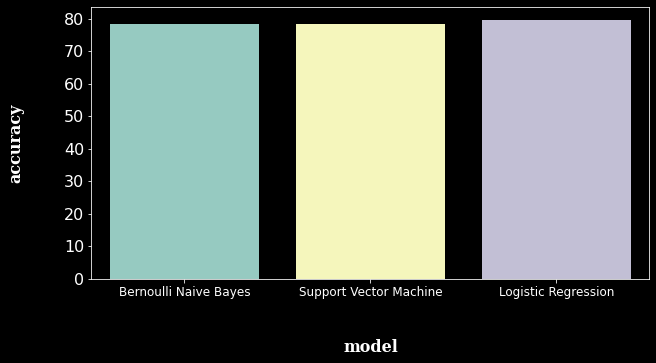

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
plt.xlabel('Model',fontdict=font,labelpad=40)
plt.ylabel('Accuracy',fontdict=font,labelpad=40)
plt.xticks(fontsize=12)
plt.yticks(fontsize=16)
sns.barplot(x=acc_df['model'], y=acc_df['accuracy'])
plt.show()

In [85]:
df_f1 = pd.concat([f1,f12,f13],axis=1)

In [86]:
df_f1

,f1 score,f1 score,f1 score
0,0.78,0.78,0.79
1,0.79,0.79,0.80


In [87]:
df_f1.columns = ['NB f1','SVC f1','LR f1']

In [88]:
df_f1

,NB f1,SVC f1,LR f1
0,0.78,0.78,0.79
1,0.79,0.79,0.80


# Naive Bayes without TF-IDF from Scratch

In [43]:
preprocessedtext

['USER URL aww that bummer you shoulda got david carr third day EMOJIwink ',
 'upset that can update his facebook texting and might cry result school today also blah ',
 'USER dived many time for the ball managed save the rest out bound ',
 'whole body feel itchy and like it fire ',
 'USER not behaving all mad why here because can see you all over there ',
 'USER not the whole crew ',
 'need hug ',
 'USER hey long time see yes rain bit only bit lol fine thanks how you ',
 'USER nope they didn have ',
 'USER que muera ',
 'spring break plain city snowing ',
 'just pierced ear ',
 'USER couldn bear watch and thought the loss wa embarrassing ',
 'USER count idk why did either you never talk anymore ',
 'USER would been the first but didn have gun not really though zac snyder just doucheclown ',
 'USER wish got watch with you miss you and USER how wa the premiere ',
 'hollis death scene will hurt severely watch film wry director cut not out now ',
 'about file tax ',
 'USER ahh ive always 

In [44]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
import string

In [45]:
def process_tweet(tweet):
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    
    # tokenize tweets
    # preserve_case = False for lowercasing all letters
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
    
    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean

In [46]:
def count_tweets(result, tweets, ys):
    '''
    Input:
        result: a dictionary that will be used to map each pair to its frequency
        tweets: a list of tweets
        ys: a list corresponding to the sentiment of each tweet (either 0 or 1)
    Output:
        result: a dictionary mapping each pair to its frequency
    '''

    for y, tweet in zip(ys, tweets):
        for word in process_tweet(tweet):
            pair = (word,y)

            # if the key exists in the dictionary, increment the count
            if pair in result:
                result[pair] += 1

            # else, if the key is new, add it to the dictionary and set the count to 1
            else:
                result[pair] = 1
    return result

In [47]:
freqs = count_tweets({},preprocessedtext,sentiment)

In [48]:
def train_naive_bayes(freqs, train_x, train_y):
    '''
    Input:
        freqs: dictionary from (word, label) to how often the word appears
        train_x: a list of tweets
        train_y: a list of labels correponding to the tweets (0,1)
    Output:
        logprior: the log prior. (equation 3 above)
        loglikelihood: the log likelihood of Naive bayes equation.
    '''
    loglikelihood = {}
    logprior = 0

    # calculate V, the number of unique words in the vocabulary
    vocab = set([pair[0] for pair in freqs.keys()])
    V = len(vocab)

    # calculate N_pos and N_neg
    N_pos = N_neg = 0
    for pair in freqs.keys():
        # if the label is positive (greater than zero)
        if pair[1] > 0:

            # Increment the number of positive words by the count for this (word, label) pair
            N_pos += freqs[pair]

        # else, the label is negative
        else:

            # increment the number of negative words by the count for this (word,label) pair
            N_neg += freqs[pair]

    # Calculate D, the number of documents
    D = len(train_y)

    # Calculate D_pos, the number of positive documents (*hint: use sum(<np_array>))
    D_pos = (len(list(filter(lambda x: x > 0, train_y))))

    # Calculate D_neg, the number of negative documents (*hint: compute using D and D_pos)
    D_neg = (len(list(filter(lambda x: x <= 0, train_y))))

    # Calculate logprior
    logprior = np.log(D_pos) - np.log(D_neg)

    # For each word in the vocabulary...
    for word in vocab:
        # get the positive and negative frequency of the word
        freq_pos = lookup(freqs,word,1)
        freq_neg = lookup(freqs,word,0)

        # calculate the probability that each word is positive, and negative
        p_w_pos = (freq_pos + 1) / (N_pos + V)
        p_w_neg = (freq_neg + 1) / (N_neg + V)

        # calculate the log likelihood of the word
        loglikelihood[word] = np.log(p_w_pos/p_w_neg)

    return logprior, loglikelihood

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(preprocessedtext, sentiment, test_size = 0.05, random_state = 0)

In [50]:
lp, ll = train_naive_bayes(freqs,x_train,Y_train)

NameError: name 'lookup' is not defined

In [ ]:
def load_models():
    '''
    Replace '..path/' by the path of the saved models.
    '''
    
    # Load the vectoriser.
    file = open('..path/vectoriser-ngram-(1,2).pickle', 'rb')
    vectoriser = pickle.load(file)
    file.close()
    
    
    # Load the LR Model.
    file = open('..path/Sentiment-LRv1.pickle', 'rb')
    LRmodel = pickle.load(file)
    file.close()
    
    return vectoriser, LRmodel

def predict(vectoriser, model, text):
    # Predict the sentiment
    textdata = vectoriser.transform(preprocess(text)) #Passing the tweet through the processing stage and transforming it with the vectoriser
    sentiment = model.predict(textdata)
    
    # Make a list of text with sentiment.
    data = []
    for text, pred in zip(text, sentiment):
        data.append((text,pred))
        
    # Convert the list into a Pandas DataFrame.
    df = pd.DataFrame(data, columns = ['text','sentiment'])
    df = df.replace([0,1], ["Negative","Positive"]) #Replacing the class of 0 and 1 with Negative and Positive respectively
    return df

In [ ]:
if __name__=="__main__":
    # Loading the models.
    #vectoriser, LRmodel = load_models()
    
    # Text to classify should be in a list.
    text = ["I Love Google!",
            "May the Good Lord be with you.", "I hate peanuts!",
            "Mr. Kehinde, what are you doing next? this is great!"]
    
    df = predict(vectoriser, LRmodel, text)
    print(df.head())

# SVM

Logistic Regression